# Solución Ejercicio 3.5 de la Guía 1 de Econometría 
# Universidad Ean

14 de Agosto del 2022

Ejercicio realizado por: Cristian Stiven Romero Bustos, Ruben Andres Solano Corredor y Ana María Espitia Lopez

Para el desarrollo del presente ejercicio tuvimos en cuenta que el profe nos permitio realizar los ejercicios en otros programas diferentes a R, siempre y cuando argumentaramos el paso a paso. En este caso, utilizamos Python 3 como software y como framework usamos Jupyter notebook y subimos el cuaderno final a Google colab como opción de repositorio para compartir el desarrollo del ejercicio por medio de link.

(Importante, en Google Colab solamente importamos el cuaderno, no ejecutamos allí por esto no utilizamos la libreria de google para lectura de archivos locales)

-

# Leemos los Datos

Importamos las librerias de Python que usaremos

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Descargamos los datos según link de la guía y usamos la libreria de pandas para leer el archivo formato stata

In [34]:
df=pd.read_stata('Growth.dta')

In [116]:
df.head()

,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations,colores
0,India,1.915168,0.0,765.999817,0.140502,1.45,0.133333,0.866667,Otros Paises diferentes a Malta
1,Argentina,0.617645,0.0,4462.001465,0.156623,4.99,0.933333,1.933333,Otros Paises diferentes a Malta
2,Japan,4.304759,0.0,2953.999512,0.157703,6.71,0.000000,0.200000,Otros Paises diferentes a Malta
3,Brazil,2.930097,0.0,1783.999878,0.160405,2.89,0.100000,0.100000,Otros Paises diferentes a Malta
4,United States,1.712265,0.0,9895.003906,0.160815,8.66,0.000000,0.433333,Otros Paises diferentes a Malta


# Exploramos los datos

Sacamos una correlación entre todas las variables para entender posibles asociaciones, inicialmente por medio de un heatmap.

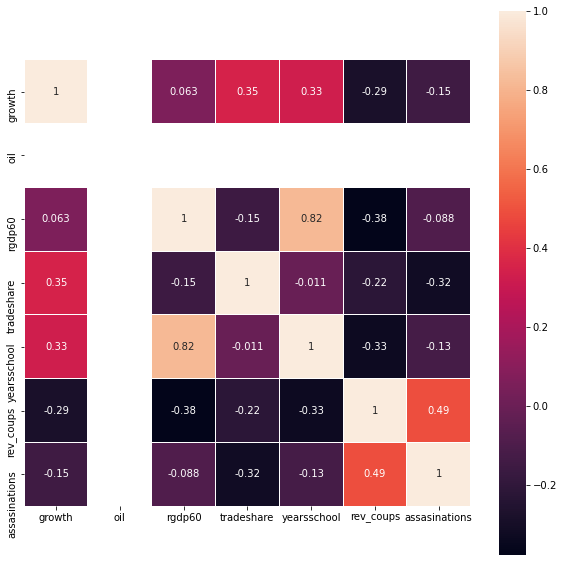

In [7]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=1, linewidths=0.01,
            square=True,annot=True,)

Realizamos una grafica de dispersión para entender cada una de las correlaciones entre las variables y su distribución

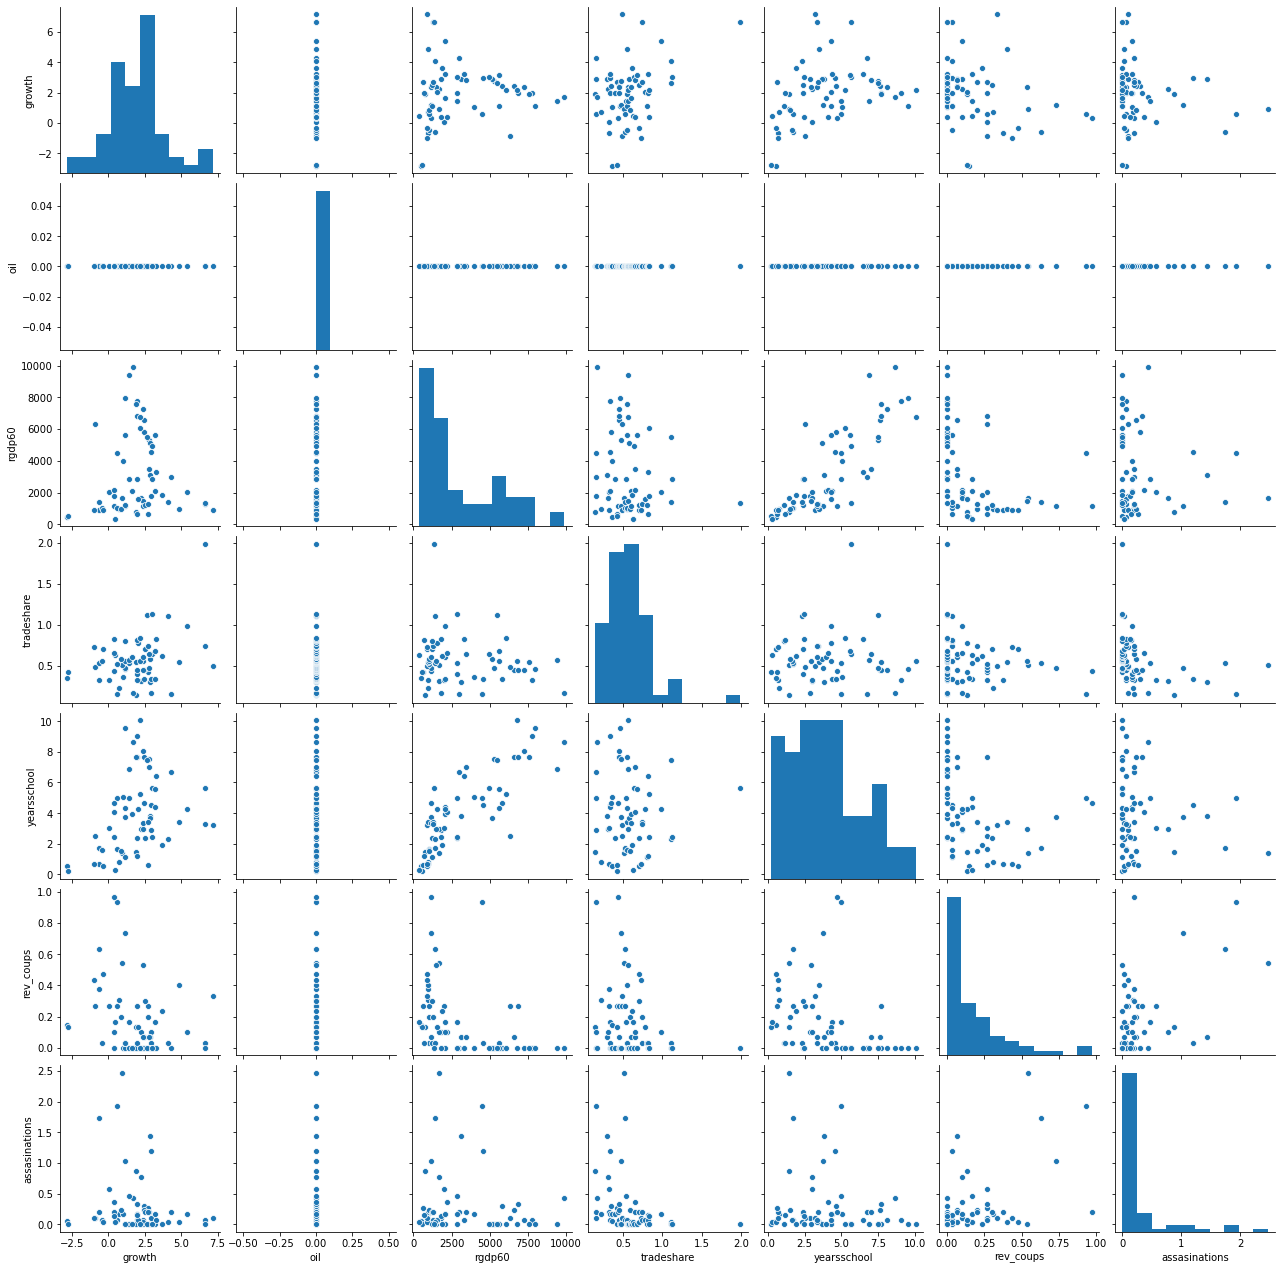

In [5]:
sns.pairplot(df,palette='Spectral')

# a) Respuesta:

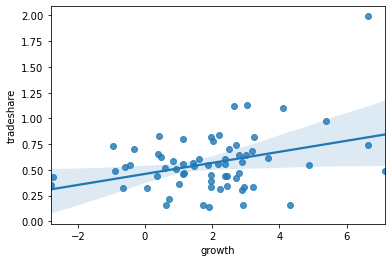

In [36]:
#Scatter y linea de tendencia
sns.regplot(x='growth',y='tradeshare',data=df)

In [37]:
df.corr()['growth'].sort_values()

rev_coups       -0.285622
assasinations   -0.150652
rgdp60           0.062708
yearsschool      0.330999
tradeshare       0.351682
growth           1.000000
oil                   NaN
Name: growth, dtype: float64

*Según Heatmap y el codigo anterior donde buscamos la correlación entre variables, encontramos que Growth y Trade share tienen un  0.351682 de correlación. 

*Por otro lado la gráfica nos muestra que la tendencia lineal no alcanza a cubrir todos los puntos de la gráfica de dispersión, esto lo explica el item anteriormente expuesto donde hablamos que el determinante de correlación es tan solo de un 35%. 

# b) Respuesta:

Para dar solución a este punto creamos una columna llamada 'colores', luego interpretamos la variable 'country_name' con una logica boleana donde se evalua que dicha variable sea igual al país Malta y posteriormente poder diferenciarlo en el Scatterplot

In [58]:
df['colores'] = ''

df.loc[df['country_name']=='Malta', 'colores'] = 'Malta'
df.loc[df['country_name']!='Malta', 'colores'] = 'Otros Paises diferentes a Malta'

In [59]:
df.head()

,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations,colores
0,India,1.915168,0.0,765.999817,0.140502,1.45,0.133333,0.866667,Otros Paises diferentes a Malta
1,Argentina,0.617645,0.0,4462.001465,0.156623,4.99,0.933333,1.933333,Otros Paises diferentes a Malta
2,Japan,4.304759,0.0,2953.999512,0.157703,6.71,0.000000,0.200000,Otros Paises diferentes a Malta
3,Brazil,2.930097,0.0,1783.999878,0.160405,2.89,0.100000,0.100000,Otros Paises diferentes a Malta
4,United States,1.712265,0.0,9895.003906,0.160815,8.66,0.000000,0.433333,Otros Paises diferentes a Malta


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 64
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country_name   65 non-null     object 
 1   growth         65 non-null     float32
 2   oil            65 non-null     float32
 3   rgdp60         65 non-null     float32
 4   tradeshare     65 non-null     float32
 5   yearsschool    65 non-null     float32
 6   rev_coups      65 non-null     float32
 7   assasinations  65 non-null     float32
 8   colores        65 non-null     object 
dtypes: float32(7), object(2)
memory usage: 5.8+ KB


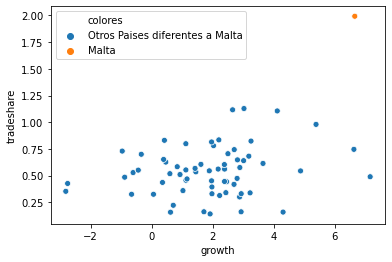

In [61]:
#Scatter diferenciando a Malta sobre los demas paises
sns.scatterplot(data=df, x='growth',y='tradeshare', hue = 'colores')

Malta es un Dato atípico dado que se encuentra desagrupado o alejado a los demás paises según la gráfica anterior, teniendo en cuenta que su valor según gráfica y tabla es de 1.992616 en tradeshare.

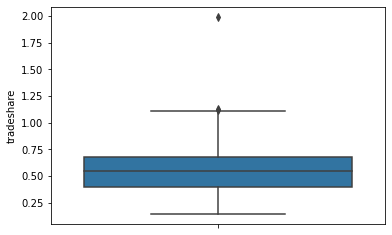

In [72]:
sns.boxplot(y='tradeshare', data=df)

Por otro lado, quisimos realizar un Boxplot para identificar cua era el umbral para considerar un dato atípico y como vemos es todo dato mayor a 1,25 en Tradeshare aproximadamente, esto quiere decir que el punto que vemos en la parte superior del Boxplot es Malta, por esta razón ratificamos que es un dato atípico ya que su valor es de 1.992616 en Tradeshare. 

# c) Respuesta:

Pendiente Estimada (m) [2.306434]
Intercepto Estimado (b) 0.6402652


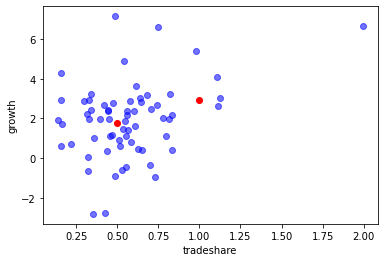

In [133]:
from sklearn import linear_model

regresion = linear_model.LinearRegression()

tradeshare = df['tradeshare'].values.reshape((-1, 1))

modelo = regresion.fit(tradeshare, df['growth'])

print("Pendiente Estimada (m)", modelo.coef_)
print("Intercepto Estimado (b)", modelo.intercept_)


#Aquí nuestra x es Tradeshare ya que en el ejercicio nos dicen que saquemos una predicción a partir de unos datos
# de la participación de comercio (TradeShare) y la variable a predecir es el crecimiento (Growth)

entrada = [[0.5], [1]] #Estos son los datos que nos da el ejercicio de tradeshare para predecir su Growth
modelo.predict(entrada)

plt.scatter(entrada, modelo.predict(entrada), color="red")#Los puntos rojos son la predicción que nos pide el ejercicio


plt.ylabel('growth')
plt.xlabel('tradeshare')
plt.scatter(df['tradeshare'], df['growth'], color="blue", alpha=0.55)
plt.show()

In [134]:
print(modelo.predict(entrada))

[1.79348218 2.94669914]


# d) Respuesta:

Como solución a este punto utilizaremos la variable que creamos para diferenciar a Malta sobre los otros paises y así excluir a dicho país y poder ejecutar el modelo

In [140]:
ddf = df[df['colores'].isin(['Otros Paises diferentes a Malta'])]

In [141]:
ddf.info() #Nombramos el data frame diferente porque no tiene a Malta

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country_name   64 non-null     object 
 1   growth         64 non-null     float32
 2   oil            64 non-null     float32
 3   rgdp60         64 non-null     float32
 4   tradeshare     64 non-null     float32
 5   yearsschool    64 non-null     float32
 6   rev_coups      64 non-null     float32
 7   assasinations  64 non-null     float32
 8   colores        64 non-null     object 
dtypes: float32(7), object(2)
memory usage: 3.2+ KB


Pendiente Estimada (m) [1.6809044]
Intercepto Estimado (b) 0.9574109


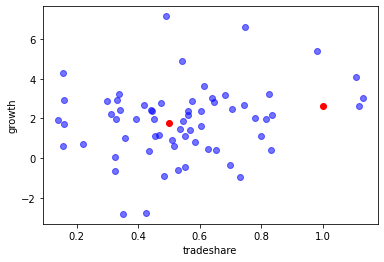

In [142]:
from sklearn import linear_model

regresion_ddf = linear_model.LinearRegression()

tradeshare_ddf = ddf['tradeshare'].values.reshape((-1, 1))

modelo_ddf = regresion.fit(tradeshare_ddf, ddf['growth'])

print("Pendiente Estimada (m)", modelo_ddf.coef_)
print("Intercepto Estimado (b)", modelo_ddf.intercept_)


#Aquí nuestra x es Tradeshare ya que en el ejercicio nos dicen que saquemos una predicción a partir de unos datos
# de la participación de comercio (TradeShare) y la variable a predecir es el crecimiento (Growth)

entrada_sinMalta = [[0.5], [1]] #Estos son los datos que nos da el ejercicio de tradeshare para predecir su Growth
modelo_ddf.predict(entrada_sinMalta)

plt.scatter(entrada_sinMalta, modelo_ddf.predict(entrada_sinMalta), color="red")#Los puntos rojos son la predicción


plt.ylabel('growth')
plt.xlabel('tradeshare')
plt.scatter(ddf['tradeshare'], ddf['growth'], color="blue", alpha=0.55)
plt.show()

In [143]:
print(modelo_ddf.predict(entrada_sinMalta))

[1.79786307 2.63831526]


# e) Respuesta:

¿Dónde queda Malta? ¿Por qué es la participación de
comercio de Malta tan alta? ¿Debería Malta ser incluida o excluida
del análisis? : Malta queda en el mar mediterraneo y es geograficamente un país con una posición estratégica dado que es cercano a Europa y a Africa, por esta razón su trade share es elevado. Si bien Malta tiene una participación de comercio significativa (Outlier) dentro de los paises evaluados, el echo de que esta se cuente con los demás eleva los pronosticos en un modelo de regresión.

